In [1]:
import pandas as pd
import csv
import glob
import random
import re
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_sas = pd.read_csv('stop_and_search_preprocessed.csv')
df_sas

#splitting on T to get the date seperately
lst_date = []
for index, row in df_sas.iterrows():
    date_time = df_sas['Date'][index].split('T')
    lst_date.append(pd.Timestamp(date_time[0]))

df_sas['Date_year_month_day'] = lst_date
# df_sas
df_sas

,Unnamed: 0,index,NAME,AREA_CODE,field_1,Type,Date,Part of a policing operation,Policing operation,Latitude,...,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,geometry,Date_year_month_day
0,0,3229,Underhill Ward,LBW,1660,Person search,2016-06-04T20:40:00+00:00,0.0,NaN,51.643324,...,18-24,Asian or Asian British - Any other Asian ethni...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.196449 51.643324),2016-06-04
1,1,3229,Underhill Ward,LBW,2627,Person search,2016-06-07T17:30:00+00:00,0.0,NaN,51.643324,...,10-17,Black or Black British - African (B2),Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,POINT (-0.196449 51.643324),2016-06-07
2,2,3229,Underhill Ward,LBW,3601,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,over 34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10
3,3,3229,Underhill Ward,LBW,3602,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10
4,4,3229,Underhill Ward,LBW,5346,Person search,2016-06-15T12:28:00+00:00,0.0,NaN,51.645542,...,10-17,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.207375 51.645542),2016-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,17529,6306,Woodhouse Ward,LBW,5010,Person search,2022-12-15T16:35:00+00:00,0.0,NaN,51.610138,...,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,POINT (-0.163636 51.610138),2022-12-15
17530,17530,6306,Woodhouse Ward,LBW,3558,Person search,2023-01-07T17:30:00+00:00,0.0,NaN,51.615374,...,18-24,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,POINT (-0.164942 51.615374),2023-01-07
17531,17531,6306,Woodhouse Ward,LBW,6221,Person search,2023-01-13T00:50:00+00:00,0.0,NaN,51.615374,...,25-34,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,POINT (-0.164942 51.615374),2023-01-13
17532,17532,6306,Woodhouse Ward,LBW,12163,Person search,2023-01-24T00:00:00+00:00,0.0,NaN,51.617838,...,18-24,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,POINT (-0.159787 51.617838),2023-01-24


In [3]:
# to get the time
lst_hour = []
for index, row in df_sas.iterrows():
    date_time = df_sas['Date'][index].split('T')
    time = date_time[1].split(':')
    hour = int(time[0])
    minute = int(time[1])
#     print(time)
    if minute > 30 :
        lst_hour.append(hour + 1)
    else:
        lst_hour.append(hour)
lst_hour
df_sas['Hour'] = lst_hour
df_allocation = df_sas.copy()
# df_allocation.drop()


In [4]:
# to get the year and the month
lst_date = []
for index, row in df_sas.iterrows():
    date_time = df_sas['Date'][index].split('T')
    date_t = re.findall('[0-9][0-9][0-9][0-9][-][0-9][0-9]', date_time[0])
    lst_date.append(date_t)

#findall gives the output in a list so, you have now a lists in a list. you want to have stings in a list.
lst_date_right = []  
for element in range(len(lst_date)):
    date = lst_date[element][0]
    lst_date_right.append(date)
lst_date_right
   

df_sas['Date_year_month'] = lst_date_right
df_sas

,Unnamed: 0,index,NAME,AREA_CODE,field_1,Type,Date,Part of a policing operation,Policing operation,Latitude,...,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,geometry,Date_year_month_day,Hour,Date_year_month
0,0,3229,Underhill Ward,LBW,1660,Person search,2016-06-04T20:40:00+00:00,0.0,NaN,51.643324,...,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.196449 51.643324),2016-06-04,21,2016-06
1,1,3229,Underhill Ward,LBW,2627,Person search,2016-06-07T17:30:00+00:00,0.0,NaN,51.643324,...,Black,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,POINT (-0.196449 51.643324),2016-06-07,17,2016-06
2,2,3229,Underhill Ward,LBW,3601,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06
3,3,3229,Underhill Ward,LBW,3602,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06
4,4,3229,Underhill Ward,LBW,5346,Person search,2016-06-15T12:28:00+00:00,0.0,NaN,51.645542,...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.207375 51.645542),2016-06-15,12,2016-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,17529,6306,Woodhouse Ward,LBW,5010,Person search,2022-12-15T16:35:00+00:00,0.0,NaN,51.610138,...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,POINT (-0.163636 51.610138),2022-12-15,17,2022-12
17530,17530,6306,Woodhouse Ward,LBW,3558,Person search,2023-01-07T17:30:00+00:00,0.0,NaN,51.615374,...,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,POINT (-0.164942 51.615374),2023-01-07,17,2023-01
17531,17531,6306,Woodhouse Ward,LBW,6221,Person search,2023-01-13T00:50:00+00:00,0.0,NaN,51.615374,...,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,POINT (-0.164942 51.615374),2023-01-13,1,2023-01
17532,17532,6306,Woodhouse Ward,LBW,12163,Person search,2023-01-24T00:00:00+00:00,0.0,NaN,51.617838,...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,POINT (-0.159787 51.617838),2023-01-24,0,2023-01


In [5]:
#to only get the year

lst_date = []
for index, row in df_sas.iterrows():
    date_time = df_sas['Date'][index].split('T')
    date_t = re.findall('[0-9][0-9][0-9][0-9]', date_time[0])
    lst_date.append(date_t)
    
#findall gives the output in a list so, you have now a lists in a list. you want to have stings in a list.   
lst_year_right = []  
for element in range(len(lst_date)):
    date = lst_date[element][0]
    lst_year_right.append(date)
lst_year_right
   

df_sas['Year'] = lst_year_right
df_sas


,Unnamed: 0,index,NAME,AREA_CODE,field_1,Type,Date,Part of a policing operation,Policing operation,Latitude,...,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,geometry,Date_year_month_day,Hour,Date_year_month,Year
0,0,3229,Underhill Ward,LBW,1660,Person search,2016-06-04T20:40:00+00:00,0.0,NaN,51.643324,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.196449 51.643324),2016-06-04,21,2016-06,2016
1,1,3229,Underhill Ward,LBW,2627,Person search,2016-06-07T17:30:00+00:00,0.0,NaN,51.643324,...,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Suspect arrested,NaN,NaN,POINT (-0.196449 51.643324),2016-06-07,17,2016-06,2016
2,2,3229,Underhill Ward,LBW,3601,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06,2016
3,3,3229,Underhill Ward,LBW,3602,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06,2016
4,4,3229,Underhill Ward,LBW,5346,Person search,2016-06-15T12:28:00+00:00,0.0,NaN,51.645542,...,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,POINT (-0.207375 51.645542),2016-06-15,12,2016-06,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,17529,6306,Woodhouse Ward,LBW,5010,Person search,2022-12-15T16:35:00+00:00,0.0,NaN,51.610138,...,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,POINT (-0.163636 51.610138),2022-12-15,17,2022-12,2022
17530,17530,6306,Woodhouse Ward,LBW,3558,Person search,2023-01-07T17:30:00+00:00,0.0,NaN,51.615374,...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,POINT (-0.164942 51.615374),2023-01-07,17,2023-01,2023
17531,17531,6306,Woodhouse Ward,LBW,6221,Person search,2023-01-13T00:50:00+00:00,0.0,NaN,51.615374,...,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,NaN,POINT (-0.164942 51.615374),2023-01-13,1,2023-01,2023
17532,17532,6306,Woodhouse Ward,LBW,12163,Person search,2023-01-24T00:00:00+00:00,0.0,NaN,51.617838,...,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN,POINT (-0.159787 51.617838),2023-01-24,0,2023-01,2023


In [6]:
# makes a season column in the dataframe
season = []
for index, row in df_sas.iterrows():
    month = df_sas['Date_year_month'][index].split('-')[1]
    if month in ['12','01','02']: #winter
        season.append('Winter')        
    if month in ['03','04', '05']: #spring
        season.append('Spring')
    if month in ['06', '07', '08']:
        season.append('Summer')
    if month in ['09', '10', '11']:
        season.append('Autumn')

month_lst = []
for index, row in df_sas.iterrows():
    month = df_sas['Date_year_month'][index].split('-')[1]
    month_lst.append(month)

df_sas['Season'] = season
df_sas['Month.'] = month_lst

In [7]:
#to rename the NAME without ward, otherwie it is not compatible with the other dataframe
lst_ward = []
for index, row in df_sas.iterrows():
    element = df_sas['NAME'][index]
    element = element[:-4].strip()
    lst_ward.append(element)
df_sas["Ward"] = lst_ward
df_sas

,Unnamed: 0,index,NAME,AREA_CODE,field_1,Type,Date,Part of a policing operation,Policing operation,Latitude,...,Outcome linked to object of search,Removal of more than just outer clothing,geometry,Date_year_month_day,Hour,Date_year_month,Year,Season,Month.,Ward
0,0,3229,Underhill Ward,LBW,1660,Person search,2016-06-04T20:40:00+00:00,0.0,NaN,51.643324,...,NaN,NaN,POINT (-0.196449 51.643324),2016-06-04,21,2016-06,2016,Summer,06,Underhill
1,1,3229,Underhill Ward,LBW,2627,Person search,2016-06-07T17:30:00+00:00,0.0,NaN,51.643324,...,NaN,NaN,POINT (-0.196449 51.643324),2016-06-07,17,2016-06,2016,Summer,06,Underhill
2,2,3229,Underhill Ward,LBW,3601,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06,2016,Summer,06,Underhill
3,3,3229,Underhill Ward,LBW,3602,Person and Vehicle search,2016-06-10T12:22:00+00:00,0.0,NaN,51.651273,...,NaN,NaN,POINT (-0.201135 51.651273),2016-06-10,12,2016-06,2016,Summer,06,Underhill
4,4,3229,Underhill Ward,LBW,5346,Person search,2016-06-15T12:28:00+00:00,0.0,NaN,51.645542,...,NaN,NaN,POINT (-0.207375 51.645542),2016-06-15,12,2016-06,2016,Summer,06,Underhill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,17529,6306,Woodhouse Ward,LBW,5010,Person search,2022-12-15T16:35:00+00:00,0.0,NaN,51.610138,...,NaN,NaN,POINT (-0.163636 51.610138),2022-12-15,17,2022-12,2022,Winter,12,Woodhouse
17530,17530,6306,Woodhouse Ward,LBW,3558,Person search,2023-01-07T17:30:00+00:00,0.0,NaN,51.615374,...,NaN,NaN,POINT (-0.164942 51.615374),2023-01-07,17,2023-01,2023,Winter,01,Woodhouse
17531,17531,6306,Woodhouse Ward,LBW,6221,Person search,2023-01-13T00:50:00+00:00,0.0,NaN,51.615374,...,NaN,NaN,POINT (-0.164942 51.615374),2023-01-13,1,2023-01,2023,Winter,01,Woodhouse
17532,17532,6306,Woodhouse Ward,LBW,12163,Person search,2023-01-24T00:00:00+00:00,0.0,NaN,51.617838,...,NaN,NaN,POINT (-0.159787 51.617838),2023-01-24,0,2023-01,2023,Winter,01,Woodhouse


In [8]:
# goups the amount of stop and searches per ward per year
group_sas = df_sas.groupby(['Ward', 'Year']).size().reset_index(name='Amount_of_sas')
# goups the amount of stop and searches per ward per year
group_sas_month = df_sas.groupby(['Month.', 'Year']).size().reset_index(name='Amount_of_sas')
# goups the amount of stop and searches per ward per year per season
group_sas_season = df_sas.groupby(['Ward', 'Year', 'Season']).size().reset_index(name='Amount_of_sas')


In [9]:
df_burglary = pd.read_csv('burglaries_preprocessed.csv')


In [10]:
# makes a season column in the dataframe
season = []
for index, row in df_burglary.iterrows():
    month = df_burglary['Month'][index].split('-')[1]
    if month in ['12','01','02']: #winter
        season.append('Winter')        
    if month in ['03','04', '05']: #spring
        season.append('Spring')
    if month in ['06', '07', '08']:
        season.append('Summer')
    if month in ['09', '10', '11']:
        season.append('Autumn')
        
#makes a month column in the dataframe
month_lst = []
for index, row in df_burglary.iterrows():
    month = df_burglary['Month'][index].split('-')[1]
    month_lst.append(month)

df_burglary['Season'] = season
df_burglary['Month.'] = month_lst
df_burglary

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Season,Ward,Month.
0,0,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,NaN,NaN,Winter,High Barnet,12
1,1,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,NaN,NaN,Winter,High Barnet,12
2,2,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,NaN,NaN,Winter,High Barnet,12
3,3,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,NaN,NaN,Winter,High Barnet,12
4,4,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,NaN,NaN,Winter,High Barnet,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42986,42986,fda0870be993d2c9352ae14a540bf529c15a7aa9d92a4e...,2023-03,Metropolitan Police Service,Metropolitan Police Service,-0.202163,51.559100,On or near Hocroft Road,E01000139,Barnet 041B,Burglary,Under investigation,NaN,Spring,Childs Hill,03
42987,42987,c6c2d9a772695865f4ca33fce59c26c48fe3a1cdac8c22...,2023-03,Metropolitan Police Service,Metropolitan Police Service,-0.202163,51.559100,On or near Hocroft Road,E01000139,Barnet 041B,Burglary,Under investigation,NaN,Spring,Childs Hill,03
42988,42988,e5bab2bd4f31de44515dbf125b85284392d0349139a1d3...,2023-03,Metropolitan Police Service,Metropolitan Police Service,-0.197843,51.561093,On or near Church Walk,E01000140,Barnet 041C,Burglary,Under investigation,NaN,Spring,Childs Hill,03
42989,42989,823465427f8764e250a48312715a4bd87e8012412046c6...,2023-03,Metropolitan Police Service,Metropolitan Police Service,-0.199449,51.563896,On or near Llanelly Road,E01000140,Barnet 041C,Burglary,Under investigation,NaN,Spring,Childs Hill,03


In [11]:
#to make it compatible with to other dataframe we neet to have a column with the year only 
lst_year = []
for index, row in df_burglary.iterrows():
    year = df_burglary['Month'][index].split('-')[0]
    lst_year.append(year)
lst_year   

df_burglary['Year'] = lst_year
df_burglary

# goups the amount of burglaries per ward per year
group_burglary = df_burglary.groupby(['Ward', 'Year']).size().reset_index(name='Amount_of_burglaries')
group_burglary

# goups the amount of burglaries per month
group_burglary_month = df_burglary.groupby(['Month.','Year']).size().reset_index(name='Amount_of_burglaries')

# goups the amount of burglaries per ward per year per season
group_burglary_season = df_burglary.groupby(['Ward', 'Year', 'Season']).size().reset_index(name='Amount_of_burglaries')
group_burglary_season


,Ward,Year,Season,Amount_of_burglaries
0,Barnet Vale,2010,Winter,13
1,Barnet Vale,2011,Autumn,47
2,Barnet Vale,2011,Spring,51
3,Barnet Vale,2011,Summer,38
4,Barnet Vale,2011,Winter,52
...,...,...,...,...
1219,Woodhouse,2022,Spring,12
1220,Woodhouse,2022,Summer,15
1221,Woodhouse,2022,Winter,24
1222,Woodhouse,2023,Spring,7


In [12]:
#merges the group_sas with the group burglary based on the ward and the year
df_merge= pd.merge(group_sas,group_burglary, on= ['Ward', 'Year'])
df_merge
#merges the group_sas with the group burglary based on the month
df_merge_month= pd.merge(group_sas_month,group_burglary_month, on= ['Year', 'Month.'])
df_merge_month
#merges the group_sas with the group burglary based on the ward and the year and the season
df_merge_season = pd.merge(group_sas_season,group_burglary_season, on= ['Ward', 'Year', 'Season'])
df_merge_month.sort_values(by=['Year', 'Month.'], inplace=True)

#makes a column burglaries_next_month based on shifting the amount ofburglaries to the next month
df_merge_month['burglaries_next_month'] = df_merge_month['Amount_of_burglaries'].shift(-1)
df_merge_month.reset_index(inplace = True)

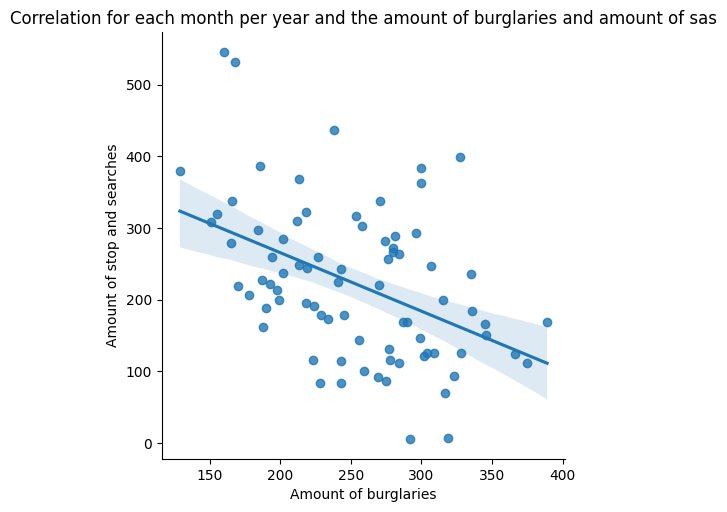

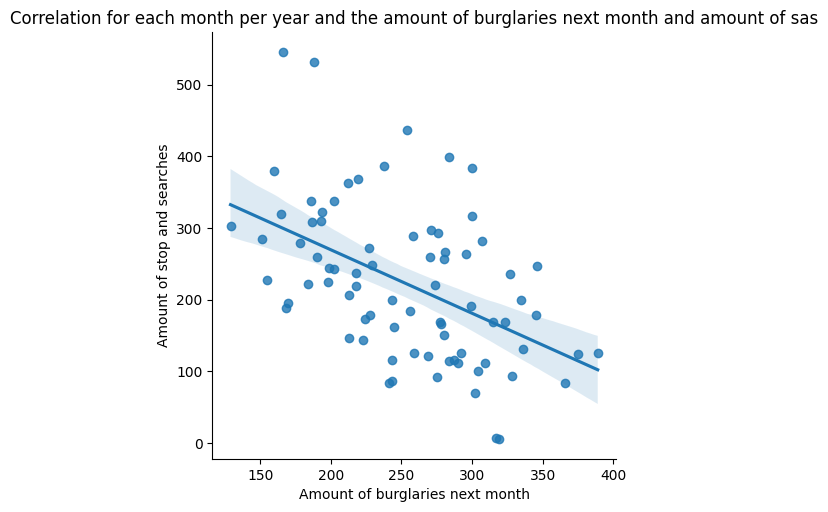

In [13]:
#looks at correclation of each month per year and the amount of burglaries and amount of sas. 
stats.pearsonr(df_merge_month['Amount_of_burglaries'], df_merge_month['Amount_of_sas']) ##-0.45
ax = sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_merge_month).set(title = 'Correlation for each month per year and the amount of burglaries and amount of sas', xlabel = 'Amount of burglaries', ylabel= 'Amount of stop and searches');
ax.savefig('correlation.png')

#looks at correclation of each month per year and the amount of burglaries next month and amount of sas. 
df_merge_month_withoutNAN = df_merge_month.dropna()
stats.pearsonr(df_merge_month_withoutNAN['burglaries_next_month'], df_merge_month_withoutNAN['Amount_of_sas']) #-0.48
sns.lmplot(x="burglaries_next_month", y="Amount_of_sas", data=df_merge_month_withoutNAN).set(title = 'Correlation for each month per year and the amount of burglaries next month and amount of sas', xlabel = 'Amount of burglaries next month', ylabel= 'Amount of stop and searches');
ax.savefig('correlation_next_month.png')

In [14]:
# makes a scatterplot 

ax = sns.scatterplot(x="Amount_of_sas", y="Amount_of_burglaries", data=df_merge)
ax.set_title("See if there is a correltion between the amount of burglaries an the stop and searches")
ax.set_xlabel("Amount of stop and searches")
ax.set_ylabel("Amount of burglaries")

#makes a scatterplot with correlation line
sns.lmplot(x="Amount_of_sas", y="Amount_of_burglaries", data=df_merge);
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_merge);

#gives the pearsoncorrelation and the p-value
stats.pearsonr(df_merge['Amount_of_burglaries'], df_merge['Amount_of_sas'])


#dataframe of 2017 until 2022 because 2016 and 2023 are not complete
zonder_2016 = df_merge[df_merge['Year'] != '2016']
df_2017_2022 = zonder_2016[zonder_2016['Year'] != '2023']
df_2017_2022
#correlation of the years 2017 until 2022 
stats.pearsonr(df_2017_2022['Amount_of_burglaries'], df_2017_2022['Amount_of_sas']) #0.14
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2017_2022);

In [15]:
 #to check if the correlation is correct
amt_burg = np.array(df_merge['Amount_of_burglaries'])
amt_sas = np.array(df_merge['Amount_of_sas'])
np.corrcoef(amt_sas, amt_burg)

array([[1.        , 0.30510991],
       [0.30510991, 1.        ]])

In [16]:
# to see if there are any correlations between the amount of stop an searces per year and the amount of burglaries per year

# df_2016 = df_merge[df_merge['Year'] == '2016']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2016);
# stats.pearsonr(df_2016['Amount_of_burglaries'], df_2016['Amount_of_sas']) ##0.27 #niet perse iets waard

# df_2017 = df_merge[df_merge['Year'] == '2017']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2017);
# stats.pearsonr(df_2017['Amount_of_burglaries'], df_2017['Amount_of_sas']) ##0.47

# df_2018 = df_merge[df_merge['Year'] == '2018']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2018);
# stats.pearsonr(df_2018['Amount_of_burglaries'], df_2018['Amount_of_sas']) ##0.41

# df_2019 = df_merge[df_merge['Year'] == '2019']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2019);
# stats.pearsonr(df_2019['Amount_of_burglaries'], df_2019['Amount_of_sas']) ##0.32

# df_2020 = df_merge[df_merge['Year'] == '2020']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2020);
# stats.pearsonr(df_2020['Amount_of_burglaries'], df_2020['Amount_of_sas']) ##0.39

df_2021 = df_merge[df_merge['Year'] == '2021']
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2021);
# stats.pearsonr(df_2021['Amount_of_burglaries'], df_2021['Amount_of_sas']) ## 0.52

# df_2022 = df_merge[df_merge['Year'] == '2022']
# sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_2022);
# stats.pearsonr(df_2022['Amount_of_burglaries'], df_2022['Amount_of_sas']) ##0.36

In [17]:
#see if there is a correlation the seasonality the amount of stop and searched and the amount of burglaries
df_winter = df_merge_season[df_merge_season['Season'] == 'Winter']
ax = sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_winter)
stats.pearsonr(df_winter['Amount_of_burglaries'], df_winter['Amount_of_sas']) ##0.09

df_summer = df_merge_season[df_merge_season['Season'] == 'Summer']
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_summer)
stats.pearsonr(df_summer['Amount_of_burglaries'], df_summer['Amount_of_sas']) ##0.05

df_spring = df_merge_season[df_merge_season['Season'] == 'Spring']
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_spring)
stats.pearsonr(df_spring['Amount_of_burglaries'], df_spring['Amount_of_sas']) ##0.07

df_autumn = df_merge_season[df_merge_season['Season'] == 'Autumn']
sns.lmplot(x="Amount_of_burglaries", y="Amount_of_sas", data=df_autumn)
stats.pearsonr(df_autumn['Amount_of_burglaries'], df_autumn['Amount_of_sas']) ##0.12

PearsonRResult(statistic=0.156231771884745, pvalue=0.044425301019927886)

In [18]:
#Specifying all data for each ward
Barnet_Vale = df_2017_2022['Ward'] == 'Barnet Vale'
Barnet_Vale_data = df_2017_2022[Barnet_Vale]
Barnet_Vale_data

Golders_Green = df_2017_2022['Ward'] == 'Golders Green'
Golders_Green_data = df_2017_2022[Golders_Green]
Golders_Green_data

Cricklewood = df_2017_2022['Ward'] == 'Cricklewood'
Cricklewood_data = df_2017_2022[Cricklewood]
Cricklewood_data

Childs_Hill = df_2017_2022['Ward'] == 'Childs Hill'
Childs_Hill_data = df_2017_2022[Childs_Hill]
Childs_Hill_data

West_Hendon = df_2017_2022['Ward'] == 'West Hendon'
West_Hendon_data = df_2017_2022[West_Hendon]
West_Hendon_data

Hendon = df_2017_2022['Ward'] == 'Hendon'
Hendon_data = df_2017_2022[Hendon]
Hendon_data

Whetstone = df_2017_2022['Ward'] == 'Whetstone'
Whetstone_data = df_2017_2022[Whetstone]
Whetstone_data

Burnt_Oak = df_2017_2022['Ward'] == 'Burnt Oak'
Burnt_Oak_data = df_2017_2022[Burnt_Oak]
Burnt_Oak_data

Garden_Suburb = df_2017_2022['Ward'] == 'Garden Suburb'
Garden_Suburb_data = df_2017_2022[Garden_Suburb]
Garden_Suburb_data

West_Finchley = df_2017_2022['Ward'] == 'West Finchley'
West_Finchley_data = df_2017_2022[West_Finchley]
West_Finchley_data

Finchley_Church_End = df_2017_2022['Ward'] == 'Finchley Church End'
Finchley_Church_End_data = df_2017_2022[Finchley_Church_End]
Finchley_Church_End_data

Totteridge_and_Woodside = df_2017_2022['Ward'] == 'Totteridge & Woodside'
Totteridge_and_Woodside_data = df_2017_2022[Totteridge_and_Woodside]
Totteridge_and_Woodside_data

High_Barnet = df_2017_2022['Ward'] == 'High Barnet'
High_Barnet_data = df_2017_2022[High_Barnet]
High_Barnet_data

Brunswick_Park = df_2017_2022['Ward'] == 'Brunswick Park'
Brunswick_Park_data = df_2017_2022[Brunswick_Park]
Brunswick_Park_data

Edgwarebury = df_2017_2022['Ward'] == 'Edgwarebury'
Edgwarebury_data = df_2017_2022[Edgwarebury]
Edgwarebury_data

Friern_Barnet = df_2017_2022['Ward'] == 'Friern Barnet'
Friern_Barnet_data = df_2017_2022[Friern_Barnet]
Friern_Barnet_data

Mill_Hill = df_2017_2022['Ward'] == 'Mill Hill'
Mill_Hill_data = df_2017_2022[Mill_Hill]
Mill_Hill_data

Woodhouse = df_2017_2022['Ward'] == 'Woodhouse'
Woodhouse_data = df_2017_2022[Woodhouse]
Woodhouse_data

Edgware = df_2017_2022['Ward'] == 'Edgware'
Edgware_data = df_2017_2022[Edgware]
Edgware_data

East_Barnet = df_2017_2022['Ward'] == 'East Barnet'
East_Barnet_data = df_2017_2022[East_Barnet]
East_Barnet_data

Underhill = df_2017_2022['Ward'] == 'Underhill'
Underhill_data = df_2017_2022[Underhill]
Underhill_data

Colindale_North = df_2017_2022['Ward'] == 'Colindale North'
Colindale_North_data = df_2017_2022[Colindale_North]
Colindale_North_data

Colindale_South = df_2017_2022['Ward'] == 'Colindale South'
Colindale_South_data = df_2017_2022[Colindale_South]
Colindale_South_data

East_Finchley = df_2017_2022['Ward'] == 'East Finchley'
East_Finchley_data = df_2017_2022[East_Finchley]
East_Finchley_data

,Ward,Year,Amount_of_sas,Amount_of_burglaries
65,East Finchley,2017,30,111
66,East Finchley,2018,13,145
67,East Finchley,2019,41,120
68,East Finchley,2020,79,94
69,East Finchley,2021,62,108
70,East Finchley,2022,22,98


In [19]:
#Scatter plot as well as correlation number. This is done for all wards as you can see in the next 24 maps.
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=East_Barnet_data)
ax.set_title("East Barnet");
stats.pearsonr(East_Barnet_data['Amount_of_burglaries'], East_Barnet_data['Amount_of_sas']) ##-.042

PearsonRResult(statistic=-0.04248775331649962, pvalue=0.9363067196664528)

In [20]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Barnet_Vale_data)
ax.set_title("Barnet Vale");
stats.pearsonr(Barnet_Vale_data['Amount_of_burglaries'], Barnet_Vale_data['Amount_of_sas']) ##-0.07

PearsonRResult(statistic=-0.07222180784019426, pvalue=0.8918556423363918)

In [21]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Golders_Green_data);
ax.set_title("Golders Green")
stats.pearsonr(Golders_Green_data['Amount_of_burglaries'], Golders_Green_data['Amount_of_sas']) ##-0.03

PearsonRResult(statistic=-0.07754450712717952, pvalue=0.8839163827084514)

In [22]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Cricklewood_data);
ax.set_title("Cricklewood")
stats.pearsonr(Cricklewood_data['Amount_of_burglaries'], Cricklewood_data['Amount_of_sas']) ## 0.3

PearsonRResult(statistic=0.3550371726364302, pvalue=0.4898207063034506)

In [23]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Childs_Hill_data);
ax.set_title("Childs Hill")
stats.pearsonr(Childs_Hill_data['Amount_of_burglaries'], Childs_Hill_data['Amount_of_sas']) ## -0.7 

PearsonRResult(statistic=-0.7162584290988875, pvalue=0.10934200393021083)

In [24]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=West_Hendon_data);
ax.set_title("West Hendon")
stats.pearsonr(West_Hendon_data['Amount_of_burglaries'], West_Hendon_data['Amount_of_sas']) ##

PearsonRResult(statistic=-0.24092411442578274, pvalue=0.6456059796777943)

In [25]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Hendon_data);
ax.set_title("Hendon")
stats.pearsonr(Hendon_data['Amount_of_burglaries'], Hendon_data['Amount_of_sas'])

PearsonRResult(statistic=-0.6428275404675352, pvalue=0.1685756166507145)

In [26]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Whetstone_data);
ax.set_title("Whetstone")
stats.pearsonr(Whetstone_data['Amount_of_burglaries'], Whetstone_data['Amount_of_sas'])

PearsonRResult(statistic=-0.10463713385338969, pvalue=0.8436171315354412)

In [27]:
sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Burnt_Oak_data);
ax.set_title("Burnt Oak")
stats.pearsonr(Burnt_Oak_data['Amount_of_burglaries'], Burnt_Oak_data['Amount_of_sas'])

PearsonRResult(statistic=-0.7312996720399281, pvalue=0.09859973549930869)

In [28]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Garden_Suburb_data);
ax.set_title("Garden Suburb")
stats.pearsonr(Garden_Suburb_data['Amount_of_burglaries'], Garden_Suburb_data['Amount_of_sas'])

PearsonRResult(statistic=-0.013526018447624924, pvalue=0.9797122096425732)

In [29]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=West_Finchley_data);
ax.set_title("West Finchley")
stats.pearsonr(West_Finchley_data['Amount_of_burglaries'], West_Finchley_data['Amount_of_sas'])

PearsonRResult(statistic=-0.8605238630208166, pvalue=0.027823733193830847)

In [30]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Finchley_Church_End_data);
ax.set_title("Finchley Church End")
stats.pearsonr(Finchley_Church_End_data['Amount_of_burglaries'], Finchley_Church_End_data['Amount_of_sas'])

PearsonRResult(statistic=-0.5509392316249697, pvalue=0.2572055571053873)

In [31]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Totteridge_and_Woodside_data);
ax.set_title("Totteridge & Woodside")
stats.pearsonr(Totteridge_and_Woodside_data['Amount_of_burglaries'], Totteridge_and_Woodside_data['Amount_of_sas'])

PearsonRResult(statistic=-0.4246263436284711, pvalue=0.4013421485152134)

In [32]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=High_Barnet_data);
ax.set_title("High Barnet")
stats.pearsonr(High_Barnet_data['Amount_of_burglaries'], High_Barnet_data['Amount_of_sas'])

PearsonRResult(statistic=-0.21165616628798212, pvalue=0.6872566722486487)

In [33]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Brunswick_Park_data);
ax.set_title("Brunswick Park")
stats.pearsonr(Brunswick_Park_data['Amount_of_burglaries'], Brunswick_Park_data['Amount_of_sas'])

PearsonRResult(statistic=-0.6762435106535376, pvalue=0.1402595999411324)

In [34]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Edgwarebury_data);
ax.set_title("Edgwarebury")
stats.pearsonr(Edgwarebury_data['Amount_of_burglaries'], Edgwarebury_data['Amount_of_sas'])

PearsonRResult(statistic=-0.663398787678108, pvalue=0.15088204222280366)

In [35]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Friern_Barnet_data);
ax.set_title("Friern Barnet")
stats.pearsonr(Friern_Barnet_data['Amount_of_burglaries'], Friern_Barnet_data['Amount_of_sas'])

PearsonRResult(statistic=-0.3715062093003665, pvalue=0.4683777469477072)

In [36]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Mill_Hill_data);
ax.set_title("Mill Hill")
stats.pearsonr(Mill_Hill_data['Amount_of_burglaries'], Mill_Hill_data['Amount_of_sas'])

PearsonRResult(statistic=-0.38500341956306133, pvalue=0.45102894345926303)

In [37]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Woodhouse_data);
ax.set_title("Woodhouse")
stats.pearsonr(Woodhouse_data['Amount_of_burglaries'], Woodhouse_data['Amount_of_sas'])

PearsonRResult(statistic=-0.3098963345959827, pvalue=0.5500360597346099)

In [38]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Edgware_data);
ax.set_title("Edgware")
stats.pearsonr(Edgware_data['Amount_of_burglaries'], Edgware_data['Amount_of_sas'])

PearsonRResult(statistic=-0.538755648740967, pvalue=0.2700555008966107)

In [39]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Underhill_data);
ax.set_title("Underhill")
stats.pearsonr(Underhill_data['Amount_of_burglaries'], Underhill_data['Amount_of_sas'])

PearsonRResult(statistic=0.01959057810923867, pvalue=0.9706178921774811)

In [40]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=East_Finchley_data);
ax.set_title("East Finchley")
stats.pearsonr(East_Finchley_data['Amount_of_burglaries'], East_Finchley_data['Amount_of_sas'])

PearsonRResult(statistic=-0.6139709847114941, pvalue=0.1947648877365661)

In [41]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Colindale_North_data);
ax.set_title("Colindale North")
stats.pearsonr(Colindale_North_data['Amount_of_burglaries'], Colindale_North_data['Amount_of_sas'])

PearsonRResult(statistic=0.5404373072902278, pvalue=0.2682674722177283)

In [42]:
ax = sns.scatterplot(x="Amount_of_burglaries", y="Amount_of_sas", data=Colindale_South_data);
ax.set_title("Colindale South")
stats.pearsonr(Colindale_South_data['Amount_of_burglaries'], Colindale_South_data['Amount_of_sas'])

PearsonRResult(statistic=0.513526698523227, pvalue=0.2974209303417261)

In [43]:
#conclusion: there does not seem to be a correlation between amount of sas and burglarie from 2017-2022 and also a seasonal correlation